In [1]:
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp
import pandas as pn
import numpy as np

../../../gempy/plotting/visualization.py:31: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')
../../../gempy/plotting/visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')


In [2]:
geo_data = gp.read_pickle('data/alesmodel.pickle')

In [3]:
colordict = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#2a2a2a','fault_NS':'#2a2a2a','fault_NESW2':'#939393','fault_NESW1':'#939393',
             'fault_NESW3':'#939393','fault_NESW4':'#939393' }
geo_data.set_colors(colordict)

,value,formation_number,color
fault_NWSE,1,1,#2a2a2a
fault_NS,2,2,#2a2a2a
fault_NESW1,3,3,#939393
fault_NESW3,4,4,#939393
fault_NESW2,5,5,#939393
Liassic,6,6,#015482
Triassic,7,7,#9f0052
Carboniferous,8,8,#ffbe00
basement,9,9,#728f02


In [4]:
#Compiling of interpolator function
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_compile')
#verbose=['n_formation', 'n_form_per_serie_0', 'faults_relation', 'fault_matrix_loop'])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  5


In [5]:
lith_block, fault_block = gp.compute_model(interp_data)

/home/fabian/miniconda3/envs/rooclone_gdal/lib/python3.6/site-packages/theano/tensor/subtensor.py:2320: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out[0][inputs[2:]] = inputs[1]


../../../gempy/gempy_front.py:955: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


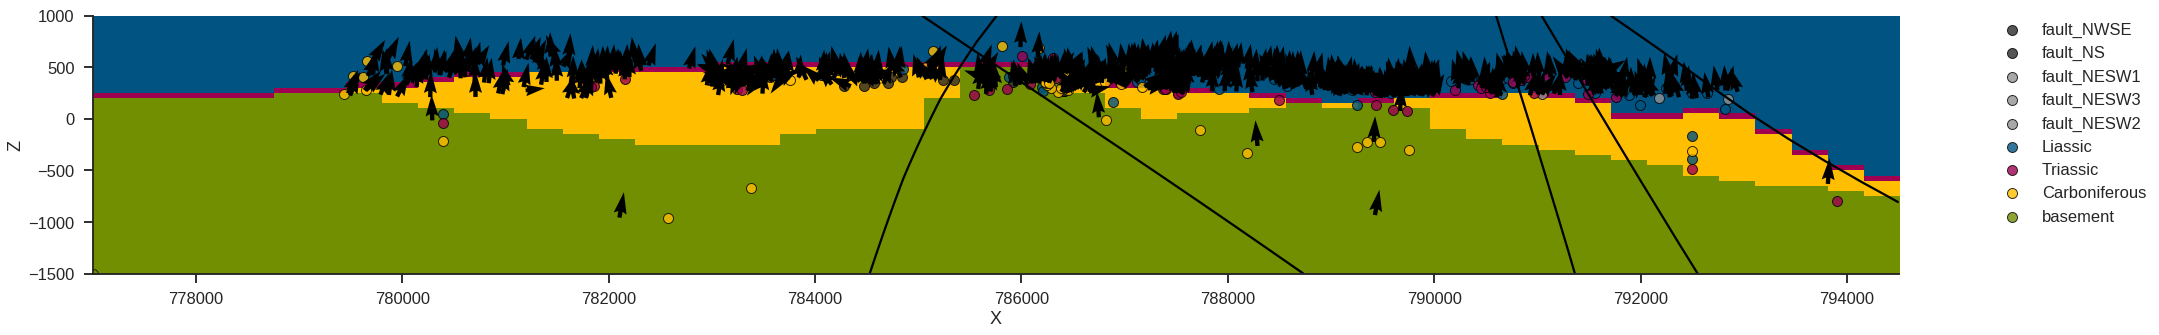

In [6]:
n, direc = 18, 'y'
gp.plot_section(geo_data, lith_block[0], cell_number=n,  direction=direc, plot_data=True)#, topography=elevation)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=n,  direction=direc)

In [7]:
import copy
geo_data_stoch_init = copy.deepcopy(interp_data.geo_data_res)

In [8]:
geo_data_stoch_init.interfaces

,X,Y,Z,formation,formation_number,isFault,order_series,series,uncertainty,annotations,formation_value
0,0.470271,0.529371,0.515379,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",1
1,0.440871,0.600880,0.517281,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",1
2,0.489644,0.475597,0.516402,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},2}$",1
3,0.492582,0.468372,0.516361,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},3}$",1
4,0.509413,0.453287,0.515756,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},4}$",1
5,0.467363,0.536690,0.514526,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},5}$",1
6,0.461692,0.541095,0.514734,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},6}$",1
7,0.475084,0.502342,0.517248,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},7}$",1
8,0.478155,0.498418,0.517226,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},8}$",1
9,0.474052,0.523891,0.515424,fault_NWSE,1,True,1,fault_NWSE,b,"${\bf{x}}_{\alpha \,{\bf{1}},9}$",1


In [36]:
import pymc

In [45]:
dev = 200. # meter

In [46]:
std = dev/interp_data.rescaling_factor

In [47]:
fault_modifier = pymc.Normal('stoch_loc', 0, 1./std**2)

In [48]:
@pymc.deterministic(trace=True)
def input_data(value=0,geo_data_stoch_init = geo_data_stoch_init,
               fault_modifier=fault_modifier):
    
    geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)  
    #print(gp.get_data(geo_data_stoch_init))
    faults_bool = geo_data_stoch_init.interfaces['formation']=='fault_NWSE'
    #faults_bool.append
    geo_data_stoch_init.interfaces.loc[faults_bool, 'X']  += np.array(fault_modifier)
    #geo_data_stoch.loc[faults_bool, 'X']  += np.array(fault_modifier)
    return [geo_data_stoch_init.interfaces[["X", "Y", "Z"]].values, 
            geo_data_stoch.xs('orientations').values]

In [49]:
@pymc.deterministic(trace=False)
def gempy_model(value=0,
                input_data=input_data, verbose=True, show = False):
    
    # modify input data values accordingly
    interp_data.geo_data_res.interfaces[["X", "Y", "Z"]] = input_data[0]

    interp_data.geo_data_res.orientations[["X", "Y", "Z","G_x", "G_y", "G_z", 
                                           'dip', 'azimuth', 'polarity']] = input_data[1] 
    interp_data.interpolator.prepare_data_frame(interp_data.geo_data_res)
    try:
        # try to compute model
        lb, fb = gp.compute_model(interp_data)
        #print(lb)
        if show:
            gp.plot_section(interp_data.geo_data_res, lb[0], 0, direction = 'y',plot_data=True)
            
        return lb,fb, interp_data

    except np.linalg.linalg.LinAlgError as err:
        if verbose:
            print("Exception occured.")
        return np.zeros_like(lith_block), np.zeros_like(fault_block)

In [50]:
params = [input_data, gempy_model, fault_modifier,lith_prob] 
model = pymc.Model(params)

In [51]:
n_iter = 10

In [52]:
dbname="/media/fabian/DATENGRAB/hdf5_databases/location_unc/model"+str(int(dev))+'m_level_b'+str(n_iter)+".hdf5"

In [53]:
dbname

'/media/fabian/DATENGRAB/hdf5_databases/location_unc/model200m_level_b10.hdf5'

In [54]:
RUN = pymc.MCMC(model, db="hdf5",dbname = dbname)

In [55]:
RUN.sample(iter=n_iter, verbose=0)

 [-----------------100%-----------------] 10 of 10 complete in 0.1 sec

In [56]:
import importlib
importlib.reload(gp.posterior_analysis_elisa)

<module 'gempy.posterior_analysis_elisa' from '../../../gempy/posterior_analysis_elisa.py'>

In [33]:
from gempy.posterior_analysis_elisa import Posterior

In [57]:
post10 = Posterior(dbname,entropy=True,interpdata=interp_data,geodata=geo_data)

Lithology probability for all post models are calculated. Based on the model complexity and the number of iterations, this could take a while


In [58]:
post10.lith_prob

array([[0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

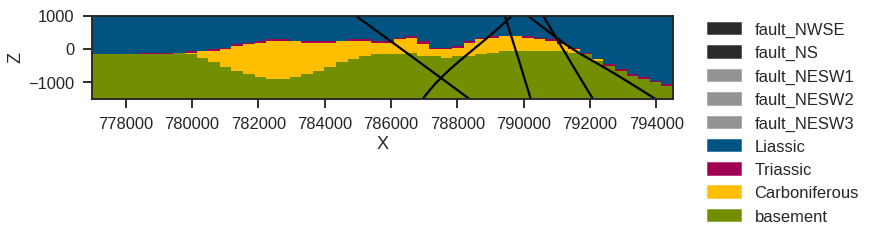

In [59]:
post10.plot_section(2)

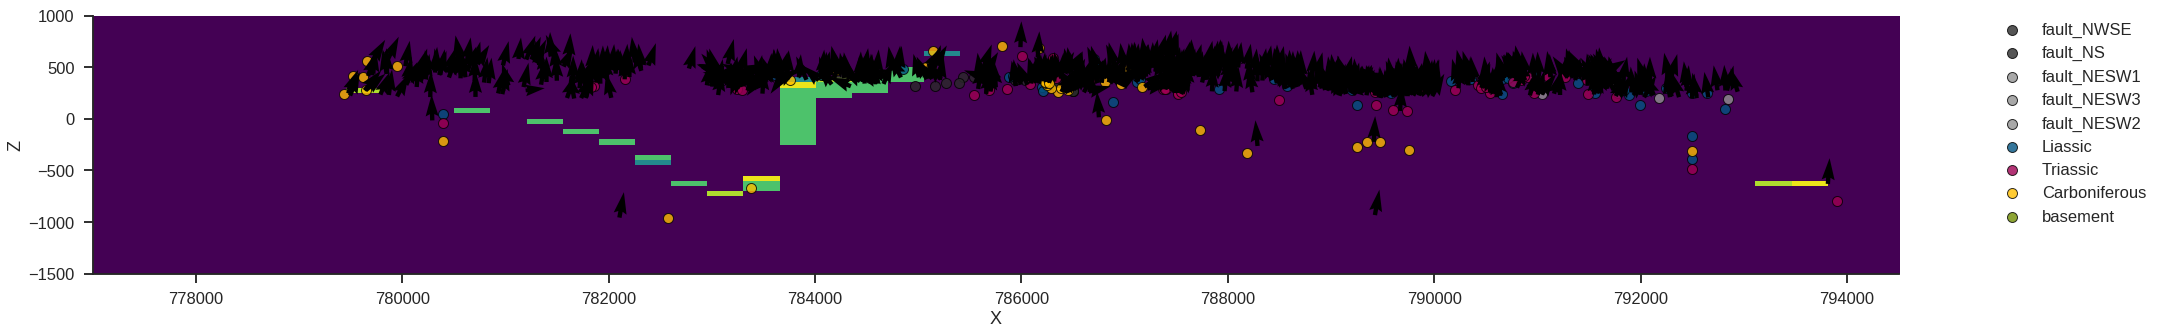

In [60]:
post10.plot_section_ie(block='lith',direction='y',cell_number=25,plot_data=True, plot_all_data=False)